<a href="https://colab.research.google.com/github/VasanSoundararajan/Image_recognisation/blob/main/Workshop5days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install tensorflow
!pip install kaggle

In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [20]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [21]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


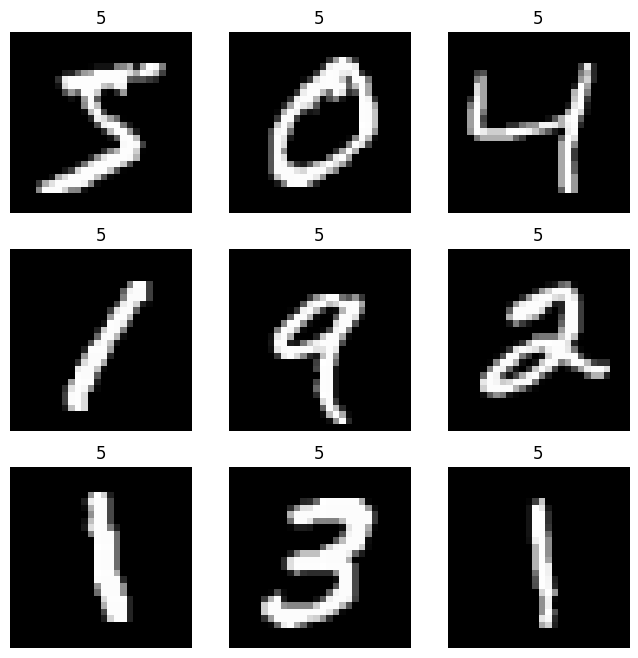

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[0])
    plt.axis('off')
plt.show()

In [23]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8971 - loss: 0.3418 - val_accuracy: 0.9839 - val_loss: 0.0540
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.9861 - loss: 0.0473 - val_accuracy: 0.9868 - val_loss: 0.0408
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 78s 33ms/step - accuracy: 0.9903 - loss: 0.0304 - val_accuracy: 0.9865 - val_loss: 0.0445
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9835 - val_loss: 0.0549
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9959 - loss: 0.0144 - val_accuracy: 0.9886 - val_loss: 0.0421


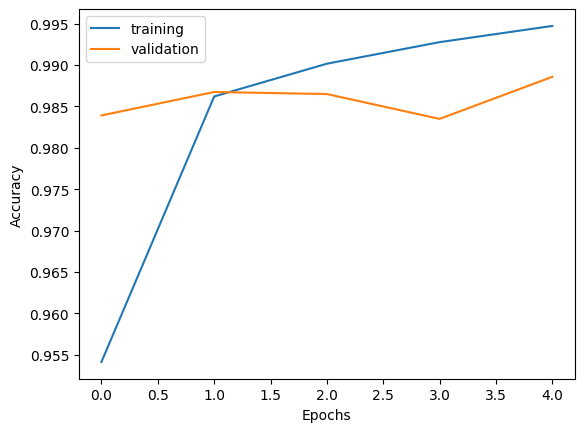

In [26]:
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
y_pred=model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9875 - loss: 0.0450
Test accuracy: 0.9904000163078308
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [28]:
from tensorflow.keras.layers import Dropout
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
X_train = X_train.reshape(-1, 28, 28, 1)
datagen.fit(X_train)

In [30]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 53ms/step - accuracy: 0.6781 - loss: 0.9562 - val_accuracy: 0.9401 - val_loss: 0.1882
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 96s 51ms/step - accuracy: 0.9209 - loss: 0.2684 - val_accuracy: 0.9634 - val_loss: 0.1163
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9390 - loss: 0.2125 - val_accuracy: 0.9561 - val_loss: 0.1383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 108s 57ms/step - accuracy: 0.9477 - loss: 0.1817 - val_accuracy: 0.9660 - val_loss: 0.1022
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9493 - loss: 0.1688 - val_accuracy: 0.9648 - val_loss: 0.1072
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 97s 52ms/step - accuracy: 0.9525 - loss: 0.1612 - val_accuracy: 0.9724 - val_loss: 0.0876
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 58ms/step - accuracy: 0.9564 - loss: 0.1507 - val_accuracy: 0.9602 - val_loss: 0.1162
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 103s 55ms/step - accuracy: 0.9572 - loss:

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Confusion Matrix:
[[ 947    0    9    5    8    3    2    0    5    1]
 [   0 1112    4    6    1    0    6    2    2    2]
 [   0    0 1005    4    1   15    4    2    0    1]
 [   0    0    7  988    0   12    1    0    2    0]
 [   0    0    1    0  977    0    2    0    1    1]
 [   0    1   65   26    0  785    2    8    4    1]
 [   1    1   17    4    3    1  926    0    5    0]
 [   4    0   72    2    8   28    0  911    0    3]
 [   1    0    7    1    1    0    1    0  962    1]
 [   3    0    6    3    5    9    0    1   20  962]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       1.00      0.98      0.99      1135
           2       0.84      0.97      0.90      1032
           3       0.95      0.98      0.96      1010
           4       0.97      0.99      0.98       982
           5       0.92      0.88      0.90       892
      

NameError: name 'sns' is not defined

<Figure size 800x600 with 0 Axes>

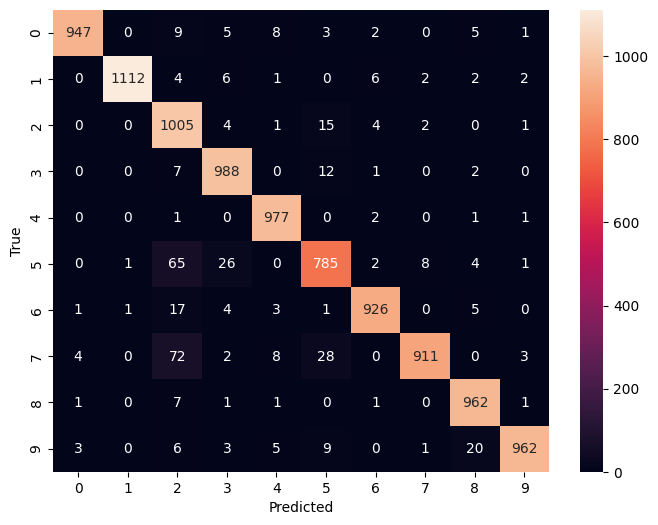

In [32]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download( 'tongpython/cat-and-dog')
print("Path to dataset files:", path)

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator = datagen.flow_from_directory('/kaggle/input/cat-and-dog', target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')
val_generator = datagen.flow_from_directory('/kaggle/input/cat-and-dog', target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')

Found 8023 images belonging to 2 classes.
Found 8023 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable=False

model = Sequential([base_model, GlobalAveragePooling2D(), Dense(128, activation='relu'), Dense(1, activation='sigmoid')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 653s 3s/step - accuracy: 0.7705 - loss: 0.5674 - val_accuracy: 0.7982 - val_loss: 0.4945
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.7984 - loss: 0.4972 - val_accuracy: 0.7983 - val_loss: 0.4874
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.7939 - loss: 0.4932 - val_accuracy: 0.8016 - val_loss: 0.4620
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.7957 - loss: 0.4724 - val_accuracy: 0.8053 - val_loss: 0.4410
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 638s 3s/step - accuracy: 0.8066 - loss: 0.4464 - val_accuracy: 0.8229 - val_loss: 0.4110


In [10]:
import tensorflow as tf

In [11]:
base_model.trainable=True
model.compile(optimizer = tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 2027s 8s/step - accuracy: 0.7990 - loss: 0.4800 - val_accuracy: 0.8299 - val_loss: 0.4028
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 2145s 9s/step - accuracy: 0.8025 - loss: 0.4534 - val_accuracy: 0.8330 - val_loss: 0.3948
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 2038s 8s/step - accuracy: 0.8001 - loss: 0.4315 - val_accuracy: 0.8422 - val_loss: 0.3854
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 2018s 8s/step - accuracy: 0.8165 - loss: 0.3931 - val_accuracy: 0.8489 - val_loss: 0.3659
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 1994s 8s/step - accuracy: 0.8281 - loss: 0.3666 - val_accuracy: 0.8655 - val_loss: 0.3422


In [12]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
load_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

In [16]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = load_model.predict(val_generator)
fpr, tpr, thresholds = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)

251/251 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step


NameError: name 'plt' is not defined

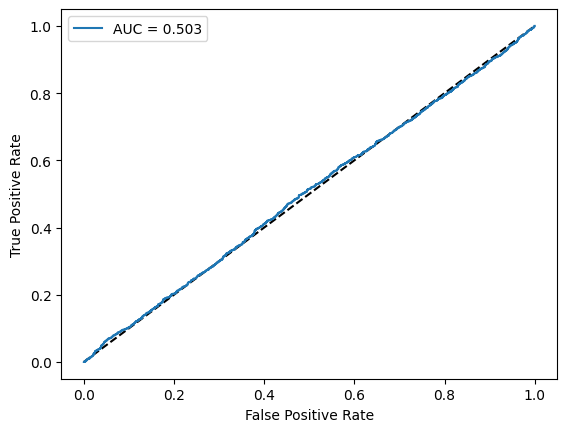

In [17]:
import matplotlib.pyplot as plt
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0 # Rescale as done in the training data

  images = np.vstack([x])
  classes = load_model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0] > 0.5:
    print(fn + " is a DOG")
  else:
    print(fn + " is a CAT")